| [**Lattice QCD I**](https://homepages.uni-regensburg.de/~lec17310/teaching/wise2122/lqft.html) | - | [**Christoph Lehner**](https://go.ur.de/lehner) |
|:-|--|-:|

# Chapter 3: statistics of continuous variables

## Univariate probability distribution and normal distribution

Let us start with a random variable $x \in \mathbb{R}$ following the probability density function (PDF) $p:\mathbb{R}\to \mathbb{R}$ with
$$
\begin{align}
\int dx p(x) = 1 \,.
\end{align}
$$

Since we only consider one variable, we call such distributions **univariate**.

We define the expectation value of a function $f:\mathbb{R}\to\mathbb{C}$ of this variable as
$$
\begin{align}
\langle f(x) \rangle = \int dx p(x) f(x) \,.
\end{align}
$$
Next, we call $\langle x^m \rangle$ the $m$-th **moment** of the distribution with first non-trivial case
$$
\mu = \langle x \rangle
$$
the **mean** of the distribution.  We refer to $\langle (x - \mu)^m \rangle$ as the $m$-th **central moment** of the distribution and the first non-trivial case
$$
\sigma^2 = \langle (x - \mu)^2 \rangle
$$
as the **variance** of the distribution and call $\sigma$ the **standard deviation**.

We define the fraction of results that fall within $n$ $\sigma$ around the mean as
$$
\begin{align}
f_n = \int_{\mu - n\sigma}^{\mu + n\sigma} dx p(x)
\end{align}
$$
which depends on the PDF.  A particularly important case is the **normal distribution**
with
$$
\begin{align}
p(x) = \frac1{\sqrt{2\pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2 \sigma^2}}
\end{align}
$$
for which the PDF only depends on the mean and the variance.  For the normal distribution,
the $f_n$ are independent of $\mu$ and $\sigma$ (***Homework***: show this independence) and
$$
\begin{align}
f_1 &= 0.682\ldots \,, \\
f_2 &= 0.954\ldots \,, \\
f_3 &= 1 - 2.6\ldots \times 10^{-3} \,, \\
f_4 &= 1 - 6.3 \ldots \times 10^{-5} \,, \\
f_5 &= 1 - 5.7\ldots \times 10^{-7} \,.
\end{align}
$$

So if we know the PDF, we can translate fluctuations of size $n$ $\sigma$ to probabilities of such a fluctuation.  And if the PDF is normal, the $f_n$ are fixed numbers.

Interestingly, the normal distribution naturally appears in averaging processes.  Let us first look at some data:

In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt

random.seed(13)

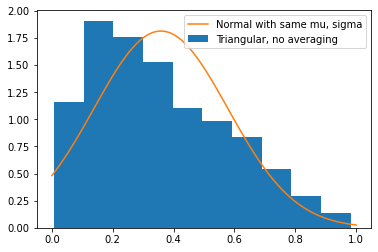

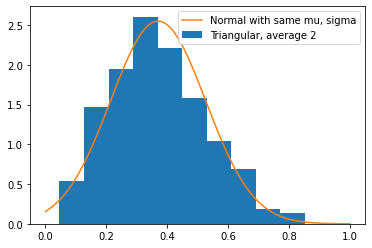

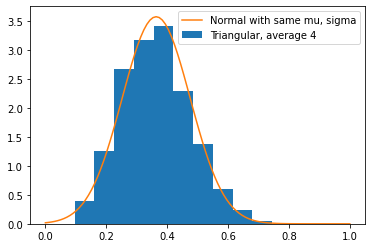

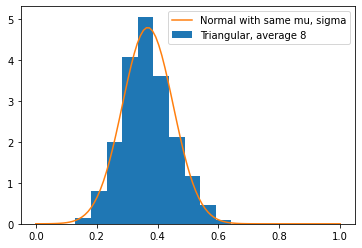

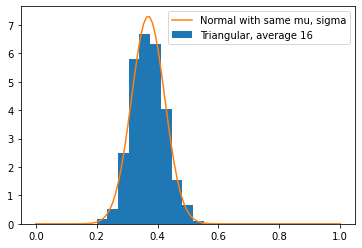

In [2]:
def histogram(X, l):
    v = [X() for i in range(1000)]
    plt.hist(v,label=l,density=True)
    mu = np.mean(v)
    sigma = np.std(v)
    x = np.linspace(0, 1.0, 100)
    y = [(2.*np.pi*sigma**2.)**-0.5*np.exp(-(xv-mu)**2./2/sigma**2.) for xv in x]
    plt.plot(x, y, label="Normal with same mu, sigma")
    plt.legend()
    plt.show()

# start with triangular distribution
def p():
    return random.triangular(0.0,1.0,0.1)

histogram(p, "Triangular, no averaging")
histogram(lambda: sum([p() for i in range(2)]) / 2.0, "Triangular, average 2")
histogram(lambda: sum([p() for i in range(4)]) / 4.0, "Triangular, average 4")
histogram(lambda: sum([p() for i in range(8)]) / 8.0, "Triangular, average 8")
histogram(lambda: sum([p() for i in range(16)]) / 16.0, "Triangular, average 16")

***Homework***: Repeat this exercise with different starting distributions.

## Central limit theorem

The effect we just observed can be shown in a straightforward way.

Consider $n$ random variables $x_1,\ldots,x_n$ drawn from the identical PDF $p(x)$.  They should be independent, i.e., their joint probability factors
$$
\begin{align}
p(x_1,\ldots,x_n)=p(x_1)\cdots p(x_n) \,.
\end{align}
$$
We then define $\tilde{x}$ as the sum of these $n$ random variables
$$
\begin{align}
\tilde{x} = \sum_{i=1}^n x_i \,.
\end{align}
$$

We first note that
$$
\begin{align}
\tilde{\mu} &= \langle \tilde{x} \rangle = \langle \sum_{i=1}^n x_i \rangle = 
\int dx_1 \cdots dx_n p(x_1,\ldots,x_n)  \sum_{i=1}^n x_i \\
&= \sum_{i=1}^n \int dx_1 \cdots dx_n p(x_1) \cdots p(x_n) x_i \\
&=\sum_{i=1}^n \int dx_i p(x_i) x_i \\
&=\sum_{i=1}^n \mu = n\mu
\end{align}
$$
and
$$
\begin{align}
\tilde{\sigma}^2  &= \langle \tilde{x}^2 \rangle - \tilde{\mu}^2 \\
&= \sum_{i,j=1}^n \langle x_i x_j \rangle - n^2\mu^2 \\
&= \sum_{i=1}^n \langle x^2 \rangle + \sum_{i\neq j} \langle x \rangle^2 - n^2\mu^2 \\
&= n (\sigma^2 + \mu^2) + n(n-1)\mu^2 - n^2\mu^2 \\
&= n\sigma^2 \,.
\end{align}
$$

It is then natural to define the helper variable
$$
\begin{align}
z = \frac{\tilde{x} - n\mu}{\sqrt{n \sigma^2}}
\end{align}
$$
which has mean 0 and variance 1.

We then define the **characteristic function** of the PDF as its
Fourier transform
$$
\begin{align}
\varphi(k) &= \int dx p(x) e^{ikx} \,, \\
p(x) &= \frac1{2\pi}\int dk \varphi(k) e^{-ikx} \,.
\end{align}
$$

The PDF for $z$ is then
$$
\begin{align}
p_z(z) &= \int dx_1 \cdots dx_n \delta\left(z - \frac{\sum_{i=1}^n x_i - n\mu}{\sqrt{n} \sigma}\right) p(x_1,\ldots,x_n) \,, \\
&= \int dx_1 \cdots dx_n \delta\left(z - \frac{\sum_{i=1}^n x_i - n\mu}{\sqrt{n} \sigma}\right) p(x_1)\cdots p(x_n) \,, \\
&= (2\pi)^{-n}\int dx_1 \cdots dx_n dk_1 \cdots dk_n \delta\left(z - \frac{\sum_{i=1}^n x_i - n\mu}{\sqrt{n} \sigma}\right) e^{-i \sum_{i=1}^n x_i k_i} \varphi(k_1)\cdots \varphi(k_n) \,, \\
\end{align}
$$
and therefore the characteristic function for $z$ is
$$
\begin{align}
\varphi_z(\omega) &= (2\pi)^{-n}\int dz \int dx_1 \cdots dx_n dk_1 \cdots dk_n \delta\left(z - \frac{\sum_{i=1}^n x_i - n\mu}{\sqrt{n} \sigma}\right) e^{-i \sum_{i=1}^n x_i k_i+i\omega z} \varphi(k_1)\cdots \varphi(k_n) \,, \\
&= (2\pi)^{-n}\int dx_1 \cdots dx_n dk_1 \cdots dk_n  e^{-i \sum_{i=1}^n x_i \left(k_i - \frac{\omega}{\sqrt{n} \sigma}\right)-i\omega \sqrt{n}\frac{\mu}{\sigma}} \varphi(k_1)\cdots \varphi(k_n) \,, \\
&=  \int dk_1 \cdots dk_n \left[\prod_{i=1}^n\delta\left(k_i - \frac{\omega}{\sqrt{n} \sigma}\right)\right] e^{-i\omega \sqrt{n}\frac{\mu}{\sigma}} \varphi(k_1)\cdots \varphi(k_n) \,, \\
&=  e^{-i\omega \sqrt{n}\frac{\mu}{\sigma}} \varphi\left(\frac{\omega}{\sqrt{n} \sigma}\right)^n \,, \\
&=  e^{-i\omega \sqrt{n}\frac{\mu}{\sigma}} \left(\varphi(0) + \varphi'(0) \frac{\omega}{\sqrt{n} \sigma}+ \frac12 \varphi''(0) \frac{\omega^2}{n \sigma^2} + O(n^{-3/2})\right)^n \,.
\end{align}
$$
Since 
$$
\begin{align}
\varphi(0) &=\int dx p(x)=1 \,, \\
\varphi'(0) &=i\int dx x p(x)=i\mu \,, \\
\varphi''(0) &= -\int dx x^2 p(x)=-(\sigma^2 + \mu^2)\,,
\end{align}
$$
and
$$
\begin{align}
\log\left(1 + \varepsilon a_1 + \varepsilon^2 a_2 + O(\varepsilon^3)\right)
&=a_1 \varepsilon + \left(a_2 - \frac12 a_1^2\right) \varepsilon^2 + O(\varepsilon^3)
\end{align}
$$
we have
$$
\begin{align}
\varphi_z(\omega) &=  e^{-i\omega \sqrt{n}\frac{\mu}{\sigma}} \left(1 + \varphi'(0) \frac{\omega}{\sqrt{n}\sigma}+\frac12 \varphi''(0) \frac{\omega^2}{n \sigma^2}+ O\left(\frac1{n^{3/2}}\right)\right)^n \\
&=  e^{-i\omega \sqrt{n}\frac{\mu}{\sigma}} e^{ i\mu \sqrt{n} \frac{\omega}{\sigma}- \frac12 \sigma^2 \frac{\omega^2}{\sigma^2}} + O(n^{-1/2}) \\
&=   e^{- \frac12 \omega^2} + O\left(\frac1{\sqrt{n}}\right) \,.
\end{align}
$$
A simple Gaussian integral then yields
$$
\begin{align}
p_z(z) = \frac1{\sqrt{2\pi}} e^{-\frac12 z^2} + O\left(\frac1{\sqrt{n}}\right) \,.
\end{align}
$$

We have just proved the **central limit theorem** that states that the sum or average of independent identically distributed random variables tends towards a normal distribution in the limit of many terms in the sum.  In the case of an average, the mean of the average is the mean of the original random variables, while the variance is reduced by $1/n$.

## Estimators and bias

Consider sampling $n$ variables $x_1,\ldots,x_n \in \mathbb{R}$ from a PDF $p(x)$ and the samples to be independent of each other.  Then we call
$$
\begin{align}
\hat{f}(x_1,\ldots,x_n)
\end{align}
$$
an **estimator**
of a functional
$$
\begin{align}
f[p]
\end{align}
$$
if
$$
\begin{align}
\lim_{n\to\infty} \hat{f}(x_1,\ldots,x_n) = f[p] \,.
\end{align}
$$

We call such an estimator **unbiased** if also
$$
\begin{align}
\langle \hat{f}(x_1,\ldots,x_n) \rangle = \int dx_1 \cdots dx_n p(x_1,\ldots,x_n) \hat{f}(x_1,\ldots,x_n) = f[p]
\end{align}
$$ 
and **biased** if this property does not hold.  An estimator is therefore unbiased if repeatedly sampling a small number of variables $n$ and averaging over the result of each gives the correct result.

Let us first consider a simple unbiased estimator for the mean of a distribution,
$$
\begin{align}
\hat{\mu}(x_1,\ldots,x_n) = \frac1n \sum_{i=1}^n x_i
\end{align}
$$
for which we already showed above that
$$
\begin{align}
\langle \hat{\mu}(x_1,\ldots,x_n) \rangle &= \int dx_1 \cdots dx_n p(x_1,\ldots,x_n)\hat{\mu}(x_1,\ldots,x_n) \\
&=\frac1n\sum_{i=1}^n \int dx_1 \cdots dx_n p(x_1) \cdots p(x_n) x_i \\
&=\frac1n\sum_{i=1}^n \int dx_i p(x_i) x_i \\
&=\frac1n\sum_{i=1}^n \langle x \rangle = \langle x \rangle \,.
\end{align}
$$

Interestingly, the estimator of the variance
$$
\begin{align}
\hat{\sigma}^2_b(x_1,\ldots,x_n) = \frac1n \sum_{i=1}^n \left( x_i - \hat{\mu}(x_1,\ldots,x_n) \right)^2
\end{align}
$$
is biased, since
$$
\begin{align}
\langle \hat{\sigma}^2_b(x_1,\ldots,x_n)\rangle &= 
\frac1n \sum_{i=1}^n \langle x^2_i \rangle - \frac1{n^2} \sum_{i,j=1}^n\langle x_i x_j \rangle \\
&= 
\left(\frac1n - \frac1{n^2}\right) \sum_{i=1}^n \langle x^2_i \rangle - \frac1{n^2} \sum_{i \neq j}\langle x_i \rangle \langle x_j \rangle \\
&=
\frac{n-1}{n} \langle x^2 \rangle - \frac{n(n-1)}{n^2} \langle x \rangle^2 \\
&=
\frac{n-1}{n} (\langle x^2 \rangle - \langle x \rangle^2 )
\end{align}
$$
which differs from the variance
$$
\begin{align}
\sigma^2 = \langle x^2 \rangle - \langle x \rangle^2 \,.
\end{align}
$$

The result, however, already tells us that an unbiased estimator can be defined by
$$
\begin{align}
\hat{\sigma}^2(x_1,\ldots,x_n) &= \frac{n}{n-1}\hat{\sigma}^2_b(x_1,\ldots,x_n) \\
&=\frac1{n-1} \sum_{i=1}^n \left( x_i - \hat{\mu}(x_1,\ldots,x_n) \right)^2 \,.
\end{align}
$$

Let us demonstrate this numerically:

In [3]:
random.seed(13)

def estimate_variance_biased(x):
    mean = sum(x) / len(x)
    return sum([ (xi - mean) ** 2.0 for xi in x]) / len(x)

def estimate_variance_unbiased(x):
    mean = sum(x) / len(x)
    return sum([ (xi - mean) ** 2.0 for xi in x]) / (len(x) - 1)

def test_variance_estimator(est, n, N = 10000):
    sigma_expected = 1.0
    E = [est([random.gauss(mu=1.0, sigma=1.0)/sigma_expected**2. for i in range(n)]) for j in range(N)]
    val = np.mean(E)
    err = np.std(E) / N**0.5
    return f"{val} +- {err}"

for n in [4,8,16,32,64]:
    print(f"Biased estimator test for n={n}: 1 ==", test_variance_estimator(estimate_variance_biased, n))
    
print()

for n in [4,8,16,32,64]:
    print(f"Unbiased estimator test for n={n}: 1 ==", test_variance_estimator(estimate_variance_unbiased, n))

Biased estimator test for n=4: 1 == 0.7495601529974043 +- 0.006091813806822378
Biased estimator test for n=8: 1 == 0.867362638559428 +- 0.004629796124124494
Biased estimator test for n=16: 1 == 0.9411682174016318 +- 0.0034581022231148107
Biased estimator test for n=32: 1 == 0.9674490769406684 +- 0.002452884914118586
Biased estimator test for n=64: 1 == 0.9804292666298523 +- 0.0017597170299214334

Unbiased estimator test for n=4: 1 == 1.0102138289446236 +- 0.008225561100470576
Unbiased estimator test for n=8: 1 == 0.9942457249248356 +- 0.005346418402603227
Unbiased estimator test for n=16: 1 == 0.9967384398055572 +- 0.003638493154759803
Unbiased estimator test for n=32: 1 == 0.998204808485841 +- 0.002571835179560784
Unbiased estimator test for n=64: 1 == 0.9971881428525637 +- 0.0017733381431177173


## Functions of averages, jackknife and bootstrap variance estimators

Consider sampling $n$ variables $x_1,\ldots,x_n \in \mathbb{R}^m$ from a PDF $p(x)$ and the samples to be independent of each other.  We define the unbiased estimator
$$
\begin{align}
\hat{x} = \frac1n \sum_{i=1}^n x_i
\end{align}
$$
of
$$
\begin{align}
\overline{x} = \langle x \rangle \,.
\end{align}
$$

Then a function $f:\mathbb{R}^m \to \mathbb{R}$
of the mean
$$
\begin{align}
f(\overline{x})
\end{align}
$$
can be estimated by
$$
\begin{align}
f(\hat{x}) \,.
\end{align}
$$
If the function is linear, the estimator is also unbiased.

Next, we can relate the variance of the estimator
$$
\begin{align}
\textrm{Var}(f,x) = \langle f(\hat{x})^2 \rangle - \langle f(\hat{x}) \rangle^2
\end{align}
$$
to the variance of $\hat{x}$ through
$$
\begin{align}
\textrm{Var}(f,x) &= \langle f(\hat{x})^2 \rangle - \langle f(\hat{x}) \rangle^2 \\
&=\langle f(\overline{x} + \hat{x}-\overline{x})^2 \rangle - \langle f(\overline{x} + \hat{x}-\overline{x}) \rangle^2 \\
&=
\langle \left(f(\overline{x}) + \frac{\partial f}{\partial x_i}(\overline{x})(\hat{x}-\overline{x})_i + \frac12 \frac{\partial^2 f}{\partial x_i \partial x_j}(\overline{x})(\hat{x}-\overline{x})_i (\hat{x}-\overline{x})_j\right)^2 \rangle \notag\\
&\quad - \langle f(\overline{x}) + \frac{\partial f}{\partial x_i}(\overline{x})(\hat{x}-\overline{x})_i + \frac12 \frac{\partial^2 f}{\partial x_i \partial x_j}(\overline{x})(\hat{x}-\overline{x})_i(\hat{x}-\overline{x})_j\rangle^2 + \langle O(\hat{x}-\overline{x})^3 \rangle \\
&=
(f(\overline{x}) \frac{\partial^2 f}{\partial x_i \partial x_j}(\overline{x}) + \frac{\partial f}{\partial x_i}\frac{\partial f}{\partial x_j}(\overline{x}))\langle (\hat{x}-\overline{x})_i(\hat{x}-\overline{x})_j \rangle  \notag\\
&\quad - f(\overline{x}) \frac{\partial^2 f}{\partial x_i \partial x_j}(\overline{x})\langle (\hat{x}-\overline{x})_i(\hat{x}-\overline{x})_j  \rangle+ \langle O(\hat{x}-\overline{x})^3 \rangle \\
&=
 \frac{\partial f}{\partial x_i}(\overline{x})\frac{\partial f}{\partial x_j}(\overline{x})\langle (\hat{x}-\overline{x})_i(\hat{x}-\overline{x})_j \rangle + \langle O(\hat{x}-\overline{x})^3 \rangle
\end{align}
$$

We have established above that due to the averaging, $\hat{x}-\overline{x} \propto 1/\sqrt{n}$.  

We now first define the **single-elimination Jackknife** resamples
$$
\begin{align}
\hat{x}_j = \frac1{n-1} \sum_{i=1,i\neq j}^n x_i=\frac1{n-1}(n \hat{x} - x_j)=\frac1{n-1}((n-1) \hat{x} + \hat{x} - x_j) = \hat{x} + \frac{1}{n-1} (\hat{x} - x_j)
\end{align}
$$
with which we can define the **single-elimination Jacknife variance estimator**
$$
\begin{align}
\textrm{Var}^J(f,x) &= \frac{n-1}{n} \sum_{j=1}^n (f(\hat{x}_j) - f(\hat{x}))^2 \\
&=\frac{n-1}{n} \sum_{j=1}^n \left(\frac{\partial f}{\partial x_i}(\hat{x}) (\hat{x}_j - \hat{x})_i\right)^2 (1 + O(1/\sqrt{n})) \\
&=\frac{\partial f}{\partial x_i}(\hat{x}) \frac{\partial f}{\partial x_l}(\hat{x}) \frac{1}{n(n-1)} \sum_{j=1}^n  (x_j-\hat{x})_i (x_j-\hat{x})_l (1 + O(1/\sqrt{n})) \,.
\end{align}
$$
We can then show that
$$
\begin{align}
\langle \textrm{Var}^J(f,x) \rangle &=\frac{\partial f}{\partial x_i}(\overline{x}) \frac{\partial f}{\partial x_l}(\overline{x}) \frac{1}{n} \langle \frac1{n-1}\sum_{j=1}^n  (x_j-\hat{x})_i (x_j-\hat{x})_l \rangle (1 + O(1/\sqrt{n})) \\
&=\frac{\partial f}{\partial x_i}(\overline{x}) \frac{\partial f}{\partial x_l}(\overline{x}) \langle \frac1{n-1}  (x-\hat{x})_i (x-\hat{x})_l \rangle (1 + O(1/\sqrt{n}))
\end{align}
$$
since all $x_j$ are distributed following $p(x_j)$ and therefore $ \langle (x_j-\hat{x})_i (x_j-\hat{x})_l \rangle = \langle (x-\hat{x})_i (x-\hat{x})_l \rangle$.
Analog to the proof of the biased estimator of $\sigma^2$ above, we can show that $\langle (x-\hat{x})_i (x-\hat{x})_l \rangle = \frac{n-1}{n} \langle (x-\overline{x})_i (x-\overline{x})_l \rangle$ and therefore
$$
\begin{align}
\langle \textrm{Var}^J(f,x) \rangle &=\frac{\partial f}{\partial x_i}(\overline{x}) \frac{\partial f}{\partial x_l}(\overline{x}) \frac{1}{n} \langle (x - \overline{x})_i(x-\overline{x})_l \rangle (1 + O(1/\sqrt{n})) \\
&=\frac{\partial f}{\partial x_i}(\overline{x}) \frac{\partial f}{\partial x_l}(\overline{x}) \langle (\hat{x} - \overline{x})_i(\hat{x}-\overline{x})_l \rangle (1 + O(1/\sqrt{n})) \\
&=\textrm{Var}(f,x) (1 + O(1/\sqrt{n}))
\end{align}
$$
since
$$
\begin{align}
\frac{\partial f}{\partial x_i}(\hat{x}) = \frac{\partial f}{\partial x_i}(\overline{x})(1+O(1/\sqrt{n}) \,.
\end{align}
$$

***Homework***: Show that this estimator is unbiased for linear $f$.

An alternative very popular resampling technique is the **bootstrap** method.  In this method, we
create $S \in \mathbb{N}^+$ pseudosamples by randomly selecting $n$ elements from the set of $\{x_1,\ldots,x_n\}$
with replacement.  The variance over these pseudosamples then estimates the distribution variance.  We illustrate both the jackknife and bootstrap methods below numerically.

In [4]:
def jackknife_variance_estimator(f, x):
    N = len(x)
    X = sum(x) / N
    mean = f(X)
    return sum([(f((N*X - x[j])/(N-1)) - mean)**2 for j in range(N)])*(N-1)/N

res = [np.random.normal(2.0,0.5,2) for i in range(100)]

sigma_expected = 0.5 / 2.0 * 2.0**0.5 / 100**0.5

print(jackknife_variance_estimator(lambda x: x[0]/x[1], res)**0.5 / sigma_expected)


tests_jk = [jackknife_variance_estimator(lambda x: x[0]/x[1], 
                                         [np.random.normal(2.0,0.5,2) for i in range(100)])**0.5 / sigma_expected 
            for l in range(100)]

print(np.mean(tests_jk), np.std(tests_jk))

0.9997201133255009
0.9943462780649956 0.06887494518918237


In [5]:
def bootstrap_variance_estimator(f, x, S):
    N = len(x)
    X = sum(x) / N
    mean = f(X)
    return sum([ (f(sum([ random.choice(x) for l in range(N) ])/N) - mean)**2 for j in range(S) ])/S

print(bootstrap_variance_estimator(lambda x: x[0]/x[1], res, 100)**0.5 / sigma_expected)

tests_bs = [bootstrap_variance_estimator(lambda x: x[0]/x[1], 
                                         [np.random.normal(2.0,0.5,2) for i in range(100)], 100)**0.5 / sigma_expected 
            for l in range(100)]

print(np.mean(tests_bs), np.std(tests_bs))

1.103734908360207
0.9880356393606512 0.11291216607476749


***Homework***: repeat the calculation of the $E_1-E_0$ energy splitting of the Harmonic oscillator using the jackknife estimator to
    assess the statistical uncertainty of the extracted value.

## Autocorrelated data and binning

So far, we have assumed all data to be statistically independent.  We have seen, however, in the last chapter that Markov chains typically yield autocorrelated data.  A simple procedure to address this issue is the following.

Consider a markov chain with elements $x_1,\ldots,x_n \in \mathbb{R}^m$.  Assuming a number $b$ that divides $n$, we could then average $b$ sequential elements to a block
$$
\begin{align}
\tilde{x}_i = \frac1b \sum_{j=1}^b x_{ib + j} \,.
\end{align}
$$

If we then define $\tilde{n} = n / b$ and 
$$
\begin{align}
\hat{\tilde{x}} = \frac1{\tilde{n}} \sum_{j=1}^{\tilde{n}} \tilde{x}_j
\end{align}
$$
then
$$
\begin{align}
\langle \hat{\tilde{x}} \rangle = \langle \hat{x} \rangle
\end{align}
$$
and
$$
\begin{align}
\langle \hat{\tilde{x}}^2 \rangle = \langle \hat{x}^2 \rangle \,.
\end{align}
$$

So binning does not affect the mean and variance but the binned results are generally less autocorrelated.  Therefore after binning sufficiently, the data can be treated as if it were independent.  If after binning too little data remains, the errors on the variance estimators, however, can grow significantly (see $1/\sqrt{n}$ terms above, $n$ reduces by the amount of binning).

Let us demonstrate this:

Acceptance rate: 0.62902
1.0007439855609455
1.000743985560925


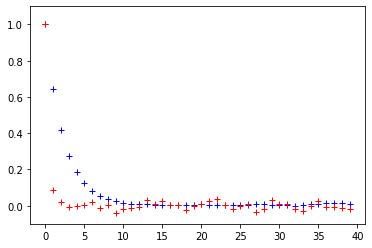

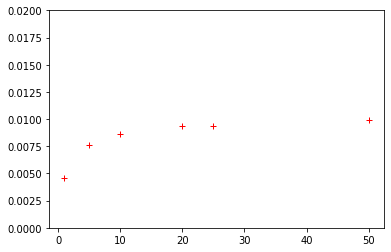

1.0007439855609455 +- 0.009350224119331632


In [6]:
def metropolis_sample_xsqr(p, step, samples):
    x0 = 0.0
    res = []
    accept = 0
    for i in range(samples):
        x = x0 + step * random.uniform(-1.0, 1.0)
        r = p(x) / p(x0)
        l = random.uniform(0.0, 1.0)
        if l < r:
            accept += 1
            x0 = x
        res.append(x0**2)
    print(f"Acceptance rate: {accept/samples}")
    return res

def bin_data(res, bin_size):
    assert len(res) % bin_size == 0
    n = len(res) // bin_size
    return [ sum(res[bin_size*i:bin_size*(i+1)])/bin_size for i in range(n) ]

def avg(X):
    return sum(X) / len(X)

res = metropolis_sample_xsqr(lambda x: np.exp(-x**2./2), 2.0, 100000)[100:]
print(avg(res))

res_binned = bin_data(res, 25)

print(avg(res_binned))

def autocovariance(Y, max_dt):
    mean = sum(Y)/len(Y)
    return [sum([ Y[t]*Y[t+dt] for t in range(len(Y) - dt) ])/(len(Y) - dt) - mean**2. for dt in range(max_dt) ]

def autocorrelator(Y, max_dt):
    Cov = autocovariance(Y, max_dt)
    return [ Cov[t] / Cov[0] for t in range(len(Cov))]


fig, ax = plt.subplots()

plt.ylim([-0.1,1.1])
ax.plot(range(40), autocorrelator(res, 40), marker='+', ls='', c='blue', label="autocorrelation original data")
ax.plot(range(40), autocorrelator(res_binned, 40), marker='+', ls='', c='red', label="autocorrelation bin-25 data")
plt.show()

bin_size = [1, 5, 10, 20, 25, 50]
error_versus_bin_size = [jackknife_variance_estimator(lambda x: x, bin_data(res, bs))**0.5 for bs in bin_size]
fig, ax = plt.subplots()
plt.ylim(0,0.02)
ax.plot(bin_size, error_versus_bin_size, marker='+', ls='', c='red', label="autocorrelation bin-25 data")
plt.show()

print(sum(res) / len(res),"+-",error_versus_bin_size[-2])

## Combining statistically independent data

Let $x_1,\ldots,x_n$ be independent random variables, i.e., $p(x_1,\ldots,x_n)=p(x_1)\cdots p(x_n)$, then
it can be shown in a similar way to the derivations above that the total variance of a function $f(x_1,\ldots,x_n)$
is the sum of the individual variances with respect to $x_i$ assuming that the fluctuations are sufficiently small that a linearization of $f$ is appropriate.

## Bayes' theorem and finding a model that best describes a given data set

We can write the joint probability of selecting a model $M$ and sampling a data set $D$ as
$$
\begin{align}
P(D \cap M) = P(D\vert M)P(M) = P(M\vert D)P(D)
\end{align}
$$
from which Bayes' theorem
$$
\begin{align}
P(M\vert D) = \frac{P(D\vert M)P(M)}{P(D)}
\end{align}
$$
follows.  If we have no prior knowledge about which model is best, one typically uses a $P(M)$, which is independent of $M$.  If prior knowledge was available, it can be included in a fitting procedure by appropriate choice of $P(M)$.  Since also $P(D)$ is independent of $M$, without prior knowledge, the model which maximises $P(M\vert D)$ also maximises $P(D\vert M)$.  Based on our earlier discussion of the central limit theorem, it is further reasonable to assume that $P(D\vert M)$ follows a normal distribution, which for a model with parameter vector $p \in \mathbb{R}^{N_\textrm{parameter}}$
can be written as
$$
\begin{align}
P(D \vert M) = (2\pi)^{-N_\textrm{data}/2} \det(C)^{-1/2} e^{-\frac12 (D_i - M_i(p)) C^{-1}_{ij} (D_j - M_j(p))} \,,
\end{align}
$$
where $D \in \mathbb{R}^{N_\textrm{data}}$ and $M:\mathbb{R}^{N_\textrm{parameter}} \to \mathbb{R}^{N_\textrm{data}}$
are the model predictions for the data.  This is well defined for positive definite $C$.  Then
$$
\begin{align}
\langle D_i \rangle = M_i(p)
\end{align}
$$
and $C \in \mathbb{R}^{N_\textrm{data} \times N_\textrm{data}}$ with
$$
\begin{align}
\langle (D_i - \langle D_i \rangle)(D_j - \langle D_j \rangle) \rangle = C_{ij} \,.
\end{align}
$$

If the individual data points are statistically independent, $C$ must be a diagonal matrix.  In our example below, this will be the case.  Since $C$ is symmetric, we can diagonalize it which yields new $N_\textrm{data}$ statistically independent normal variables.

The parameters that maximize $P(D \vert M)$ are the same as the ones that minimize the variable
$$
\begin{align}
\chi^2 = (D_i - M_i(p)) C^{-1}_{ij} (D_j - M_j(p)) \,.
\end{align}
$$
We call the parameters that minimize $\chi^2$ the fit result $p_0$ and
the value of $\chi^2$ at the minimum $\chi^2_0$.

It can be shown that $\chi^2_0$ follows the PDF of a so-called $\chi^2$-distribution with degrees of freedom $k = N_\textrm{data} - N_\textrm{parameter}$,
$$
\begin{align}
p(\chi_0^2) = \frac1{2^{k/2} \Gamma(k/2)} (\chi_0^2)^{k/2-1} e^{-\chi_0^2/2}
\end{align}
$$
with mean $k$ and variance $2k$.

The expectation value of $\chi_0^2$ is therefore $k$ with fluctuations of size $\sqrt{2k}$.  It is common
to quantify the likelyhood of the fit by considering the $P$-value defined as the likelyhood that the observed $\chi_0^2$ or a larger value would be observed, i.e.,
$$
\begin{align}
P = \int_{\chi_0^2}^\infty dx p(x) \,.
\end{align}
$$

We now turn to a numerical demonstration based on data sampled from normal distribution with variance $f(a)$
for different parameters $a$.  We may think of the parameter $a$ as the lattice spacing of the path integral and $f(a)$ as the expected functional form of the continuum ($a\to0$) limit.

Acceptance rate: 0.6392
Acceptance rate: 0.6528
Acceptance rate: 0.6646
Acceptance rate: 0.6766


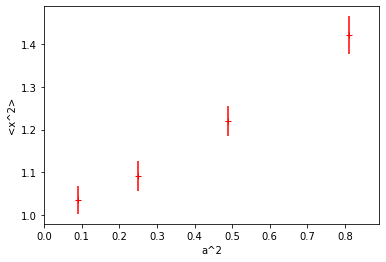

In [7]:
class xsqr_data:
    def __init__(self, lattice_spacings, f_true, nbin):
        self.lattice_spacings = lattice_spacings
        self.res = [bin_data(metropolis_sample_xsqr(
            lambda x: np.exp(-x**2./2.0/f_true(a)), 2.0, 10000)[100:],nbin) 
                    for a in lattice_spacings]
        self.xsqr_mean = [avg(x) for x in self.res]
        self.xsqr_err = [jackknife_variance_estimator(lambda x: x, X)**0.5 for X in self.res]
        
    def plot(self):
        fig, ax = plt.subplots()
        plt.xlim(0,self.lattice_spacings[-1]**2.*1.1)
        ax.errorbar([ a**2 for a in self.lattice_spacings], self.xsqr_mean, self.xsqr_err, 
                    marker='+', ls='', c='red')
        plt.xlabel("a^2")
        plt.ylabel("<x^2>")
        plt.show()
    
random.seed(13)
d = xsqr_data([ 0.3, 0.5, 0.7, 0.9 ], lambda a: 1.0 + a**2*0.5, 25)
d.plot()

In [8]:
import scipy.optimize as opt
from scipy.integrate import quad
from scipy.special import gamma

def jackknife_covariance_estimator(f, x):
    N = len(x)
    X = sum(x) / N
    mean = f(X)
    def outer_sqr(a):
        return np.outer(a,a)
    return sum([outer_sqr(f((N*X - x[j])/(N-1)) - mean) for j in range(N)])*(N-1)/N

def get_p_value(chi2, dof):
    return quad(lambda x: 2**(-dof/2)/gamma(dof/2)*x**(dof/2-1)*np.exp(-x/2), chi2, np.inf)[0]

class model_two_parameter:
    def __init__(self, power):
        self.power = power
        
    def __call__(self, a, p):
        return p[0] + p[1] * a**self.power
    
    def parameter_gradient(self, a, p):
        return np.array([1.0,a**self.power])
    
    def reasonable_parameter_values(self):
        return [0.8, 0.7]
    
class fit:
    def __init__(self, data, lattice_spacings_to_fit, model):
        self.data = data
        self.lattice_spacings_to_fit = lattice_spacings_to_fit
        self.model = model
        
    def chi_square(self, data, parameter):
        return sum([ ((self.model(x, parameter) - y) / err)**2. for x, y, err in data ]) 

    def most_likely_parameter(self, f, data):
        opt_res = opt.minimize(lambda p: self.chi_square(data, p), self.model.reasonable_parameter_values(),
                               method = "Nelder-Mead", tol = 1e-7)
        assert opt_res.success == True
        return opt_res.x, opt_res.fun
    
    def select_lattices(self, data):
        return [data[i] for i in self.lattice_spacings_to_fit]
    
    def run(self):
        mean, chi2 = self.most_likely_parameter(
            self.model, self.select_lattices(
                list(zip(self.data.lattice_spacings, self.data.xsqr_mean, self.data.xsqr_err))
            )
        )
        
        covariances = []
        for i in range(len(self.data.res)):
            covariances.append(jackknife_covariance_estimator(
                lambda resi: self.most_likely_parameter(
                    self.model, self.select_lattices(
                        list(zip(self.data.lattice_spacings, 
                                 self.data.xsqr_mean[:i] + [resi] + self.data.xsqr_mean[i+1:],
                                 self.data.xsqr_err))
                    )
                )[0],
                self.data.res[i]
            ))
            print("Covariance from a =",self.data.lattice_spacings[i],"is",covariances[i])
        
        self.best_parameter = mean
        self.best_parameter_cov = sum(covariances)
        self.chi2 = chi2
        self.dof = len(self.lattice_spacings_to_fit) - len(mean)
        self.p = get_p_value(self.chi2, self.dof)
        
        for i in range(len(mean)):
            print(f"parameter[{i}] = {self.best_parameter[i]} +- {self.best_parameter_cov[i][i]**0.5}")
        print(f"chi2 / dof = {self.chi2} / {self.dof}, i.e., p = {self.p}")

f = fit(d, [0,1,2,3], model_two_parameter(2))
f.run()

Covariance from a = 0.3 is [[ 0.00063662 -0.00106751]
 [-0.00106751  0.00179003]]
Covariance from a = 0.5 is [[ 0.00021218 -0.00021919]
 [-0.00021919  0.00022642]]
Covariance from a = 0.7 is [[5.32419334e-06 4.55058362e-05]
 [4.55058362e-05 3.88938018e-04]]
Covariance from a = 0.9 is [[ 0.00012678 -0.00059282]
 [-0.00059282  0.00277204]]
parameter[0] = 0.9725340439828718 +- 0.0313194600597356
parameter[1] = 0.5325144648541262 +- 0.07195438673559529
chi2 / dof = 0.645814241976392 / 2, i.e., p = 0.7240410994668618


The statistical estimates of both parameters agree within errors with the function that was used to generate the data.

## Plotting fit results

Once we have found the best fit parameters and have an estimate of their covariance, we can ask the question what the variance of the model prediction is for a given $a$ value.  For sufficiently small fluctuations it is straightforward to show that
$$
\begin{align}
\langle f(a,p)^2 \rangle_p - \langle f(a,p) \rangle_p^2 &=
\frac{\partial f}{\partial p_i}(a,\langle p \rangle) \frac{\partial f}{\partial p_j}(a,\langle p \rangle)
\langle (p - \langle p \rangle_p)_i (p - \langle p \rangle_p)_j \rangle \,.
\end{align}
$$

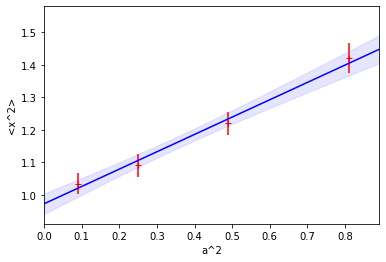

In [9]:
def make_plot(data, fit):
    
    df_dp = fit.model.parameter_gradient
    
    def err_f(a,p,cov_p):
        return np.dot(df_dp(a,p), np.dot(cov_p, df_dp(a,p)))**0.5

    fxrange = np.arange(0.0, data.lattice_spacings[-1]*1.1, 0.01)
    fy = np.array([fit.model(asqr**0.5,fit.best_parameter) for asqr in fxrange])
    fyerr = np.array([err_f(asqr**0.5,fit.best_parameter,fit.best_parameter_cov) for asqr in fxrange])
    fig, ax = plt.subplots()
    plt.xlim(0,data.lattice_spacings[-1]**2.*1.1)
    ax.fill_between(fxrange,fy-fyerr,fy+fyerr,alpha=0.1,color="blue")
    ax.plot(fxrange,fy,c="blue")
    plt.xlabel("a^2")
    plt.ylabel("<x^2>")
    ax.errorbar([ a**2 for a in data.lattice_spacings], data.xsqr_mean, data.xsqr_err, marker='+', ls='', c='red')
    plt.show()
    
make_plot(d,f)

## Systematic uncertainties in fits

The $P$-value can be used to detect models that are inconsistent with the data.  One typically would reject fits with a $P$-value below 0.05 or 0.01.  Note, however, that there may be models that are not rejected based on such a criterion which would, however, yield incorrect extrapolation results.  It is therefore crucial to understand from first principles, what model is expected to describe the data.  Let us, e.g., vary the power parameter of the model:

Covariance from a = 0.3 is [[ 0.0002933  -0.00062207]
 [-0.00062207  0.00131937]]
Covariance from a = 0.5 is [[ 0.00018441 -0.00031133]
 [-0.00031133  0.00052559]]
Covariance from a = 0.7 is [[5.70044895e-05 6.94709773e-05]
 [6.94709773e-05 8.46638004e-05]]
Covariance from a = 0.9 is [[ 2.89871654e-05 -3.63028438e-04]
 [-3.63028438e-04  4.54648273e-03]]
parameter[0] = 1.0488704541569347 +- 0.023742388886163212
parameter[1] = 0.5927260642234137 +- 0.08047425253679717
chi2 / dof = 1.1672008310949793 / 2, i.e., p = 0.5578861244091011


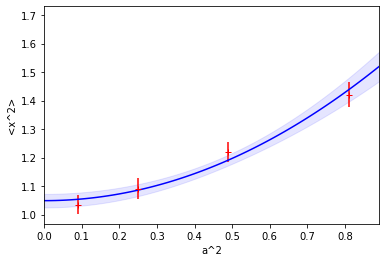

Covariance from a = 0.3 is [[ 0.00021279 -0.00051691]
 [-0.00051691  0.00125567]]
Covariance from a = 0.5 is [[ 0.00016061 -0.0003554 ]
 [-0.0003554   0.00078639]]
Covariance from a = 0.7 is [[ 8.93488411e-05 -1.22643890e-05]
 [-1.22643890e-05  1.68346079e-06]]
Covariance from a = 0.9 is [[ 9.76342071e-06 -2.68073675e-04]
 [-2.68073675e-04  7.36048333e-03]]
parameter[0] = 1.0768072629936558 +- 0.02173755115720664
parameter[1] = 0.6882784657540444 +- 0.09697536912676169
chi2 / dof = 5.04266567743004 / 2, i.e., p = 0.08035243850549526


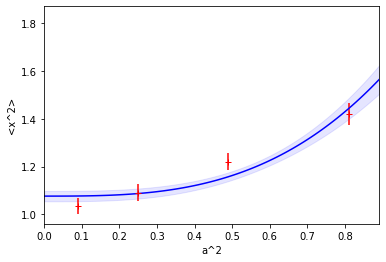

In [10]:
f = fit(d, [0,1,2,3], model_two_parameter(4))
f.run()
make_plot(d,f)

f = fit(d, [0,1,2,3], model_two_parameter(6))
f.run()
make_plot(d,f)

Both models still yielded an acceptable $P$-value, however, the $a\to 0$ result (paramter[0]) was inconsistent with the expected result of $1$.

A more realistic case is that we know the asymptotic, say $a\to0$, behavior but that at finite $a$ there are small deviations from the fit model.  Let us investigate this case.  In this case, we may devise a systematic error by investigating the effect of the data points that are least expected to follow the model (here the largest values of $a$):

Acceptance rate: 0.6363
Acceptance rate: 0.6477
Acceptance rate: 0.6539
Acceptance rate: 0.635
Covariance from a = 0.3 is [[ 0.00056386 -0.00085898]
 [-0.00085898  0.00130855]]
Covariance from a = 0.5 is [[ 0.00021469 -0.00024639]
 [-0.00024639  0.00028278]]
Covariance from a = 0.7 is [[2.79959999e-05 3.76234555e-05]
 [3.76234555e-05 5.05616674e-05]]
Covariance from a = 0.9 is [[ 9.17326352e-05 -4.12311415e-04]
 [-4.12311415e-04  1.85321944e-03]]
parameter[0] = 1.0523907312375735 +- 0.029971198544555266
parameter[1] = 0.060524600513689505 +- 0.059119506270746136
chi2 / dof = 5.119393026486666 / 2, i.e., p = 0.07732820496863554


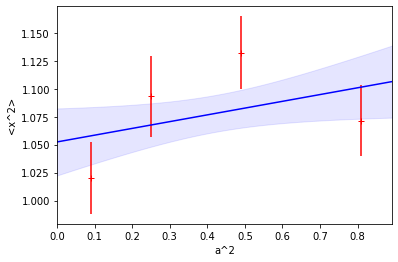

Covariance from a = 0.3 is [[ 0.00105505 -0.00245038]
 [-0.00245038  0.00569104]]
Covariance from a = 0.5 is [[ 1.69798888e-04 -1.24159148e-04]
 [-1.24159148e-04  9.07867789e-05]]
Covariance from a = 0.7 is [[ 0.00014609 -0.00103002]
 [-0.00103002  0.00726229]]
Covariance from a = 0.9 is [[0. 0.]
 [0. 0.]]
parameter[0] = 1.0053279073827692 +- 0.0370261851900245
parameter[1] = 0.27205832729781265 +- 0.11421085408373621
chi2 / dof = 0.43340017721134816 / 1, i.e., p = 0.5103252322066846


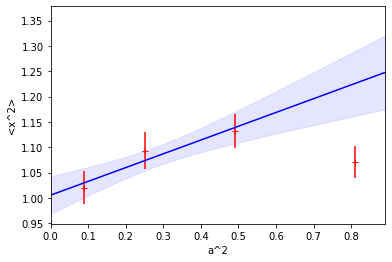

Systematic error estimate: 0.047062823854804314


In [11]:
random.seed(13)

d2 = xsqr_data([ 0.3, 0.5, 0.7, 0.9 ], lambda a: 1.0 + a**2*0.5 - a**4*0.5, 25)
f2_4a = fit(d2, [0,1,2,3], model_two_parameter(2))
f2_4a.run()
make_plot(d2,f2_4a)

f2_3a = fit(d2, [0,1,2], model_two_parameter(2))
f2_3a.run()
make_plot(d2,f2_3a)

print(f"Systematic error estimate: {f2_4a.best_parameter[0] - f2_3a.best_parameter[0]}")

After excluding the largest $a$ value, the fit results agree with the expected value and the difference of a fit to three and four lattice spacings can be used as a systematic error estimate.

## Understanding the exponential noise growth in correlation functions

Finally, we add a comment to the statistical noise of correlation functions.  Consider the two-time correlator of the previous chapter,
$$
\begin{align}
\langle x_f x_i \rangle \,,
\end{align}
$$
then its statistical variance is
$$
\begin{align}
\langle x_f^2 x_i^2 \rangle - \langle x_f x_i \rangle^2 \,.
\end{align}
$$
Since both expectation values can be related to the spectrum and matrix elements of the Hamiltonian $H$, one can estimate the signal to noise of correlation functions in a Euclidean path integral.  This is argument is typically credited to Peter Lepage.

Consider the dominant long-time energy of $\langle x_f^2 x_i^2 \rangle$ to be $E_{x^2}$ and of $\langle x_f x_i \rangle$ to be $E_{x}$, then the noise to signal behaves as
$$
\begin{align}
\frac{\sigma^2}{\mu^2} &= \frac{\langle x_f^2 x_i^2 \rangle - \langle x_f x_i \rangle^2}{\langle x_f x_i \rangle^2} \\
&=e^{-(t_f - t_i) (E_{x^2} - 2E_x)} + \textrm{const} \,.
\end{align}
$$

In the case of the Harmonic oscillator with parameters as in the last chapter, $E_{x^2}=0$ and $E_x=1$, so
the relative noise grows exponentially!

***Homework***: Perform the $E_1 - E_0$ study of the Harmonic oscillator for different lattice spacings $a$ and extrapolate to the continuum limit $a\to 0$.  Provide an estimate of both statistical and systematic uncertainties.